
# Ejercicio 2
- Estudiante: Rosa Huamaní Pucho
- Código: 20200422

## Paso 1: cargar la data a utilizar

In [2]:
#!pip install geopandas
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))
rivers=gpd.read_file(os.path.join("data","majorrivers_0_0","MajorRivers.shp"))
condados=gpd.read_file(os.path.join("data","gadm41_USA_shp","gadm41_USA_2.shp"))

In [3]:
# no warnings
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [8]:
# seleccionamos eeuu
eeuu=countries[countries.COUNTRY=='United States']

filtramos provincias y rios

In [9]:
condadosEEUU_clipped = gpd.clip(gdf=condados,
                          mask=eeuu)
riversEEUU_clipped = gpd.clip(gdf=rivers,
                               mask=eeuu)

In [10]:
countries.crs==condados.crs==condados.crs==rivers.crs==rivers.crs

True

## Paso 3: Mapas para rios y condados

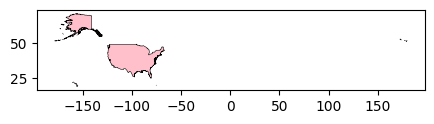

In [11]:
#mapa de eeuu
base = eeuu.plot(facecolor="pink", edgecolor='black', linewidth=0.4,figsize=(5,5))

<Axes: >

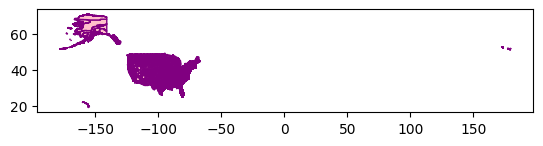

In [12]:
# mapa de sus condados
condadosEEUU_clipped.plot(marker='+', color='pink', markersize=15, edgecolor = "purple")

<Axes: >

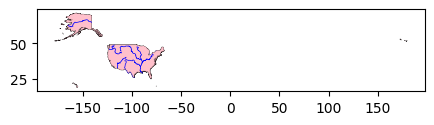

In [14]:
# mapa de rios en EEUU
base = eeuu.plot(facecolor="pink", edgecolor='black', linewidth=0.4,figsize=(5,5))
condadosEEUU_clipped.plot(marker='+', color='pink', markersize=15,
                    ax=base)
riversEEUU_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

## Paso 4: Proyección de mapa

In [15]:
#revisamos las unidades 
eeuu.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [16]:
#centroide
eeuu.centroid

C:\Users\maria\AppData\Local\Temp\ipykernel_12656\3505343862.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eeuu.centroid


229    POINT (-112.49152 45.69558)
dtype: geometry

Re-proyección del mapa

In [17]:
#recomendado para eeuu
eeuu.to_crs(4326).crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [18]:
#incluímos los cambios al centroide
eeuu.to_crs(4326).centroid

C:\Users\maria\AppData\Local\Temp\ipykernel_12656\2268357685.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eeuu.to_crs(4326).centroid


229    POINT (-112.49152 45.69558)
dtype: geometry

C:\Users\maria\AppData\Local\Temp\ipykernel_12656\3153097417.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eeuu.to_crs(4326).centroid.plot(color='red',ax=base4326)


<Axes: >

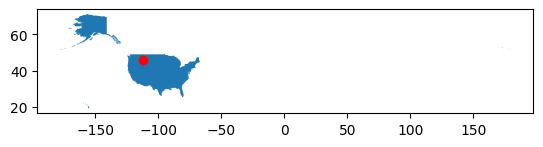

In [22]:
base4326=eeuu.to_crs(4326).plot()
eeuu.to_crs(4326).centroid.plot(color='red',ax=base4326)

In [23]:
# nos quedamos con esta verisón
eeuu_4326=eeuu.to_crs(4326)

condadosEEUU_4326=condadosEEUU_clipped.to_crs(eeuu_4326.crs)

riversEEUU_4326=riversEEUU_clipped.to_crs(eeuu_4326.crs)

In [24]:
#Guardamos
import os

eeuu_4326.to_file(os.path.join("data","EEUUMaps_4326.gpkg"), layer='country', driver="GPKG")
condadosEEUU_4326.to_file(os.path.join("data","EEUUMaps_4326.gpkg"), layer='condados', driver="GPKG")
riversEEUU_4326.to_file(os.path.join("data","EEUUMaps_4326.gpkg"), layer='rivers', driver="GPKG")

In [25]:
eeuu_4326.centroid

C:\Users\maria\AppData\Local\Temp\ipykernel_12656\405315548.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eeuu_4326.centroid


229    POINT (-112.49152 45.69558)
dtype: geometry

In [26]:
eeuu_4326.centroid.to_file(os.path.join("data","EEUUMaps_4326.gpkg"), layer='centroid', driver="GPKG")

C:\Users\maria\AppData\Local\Temp\ipykernel_12656\335529214.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eeuu_4326.centroid.to_file(os.path.join("data","EEUUMaps_4326.gpkg"), layer='centroid', driver="GPKG")


## Paso 5: Mapa de puntos para los aeropuertos

In [27]:
# importamos base de datos
import pandas as pd 
infoairports = pd.read_csv(os.path.join("data","us-airports.csv"))
# some rows

In [28]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,3632,KLAX,large_airport,Los Angeles International Airport,33.942501,-118.407997,125,NaN,United States,US,...,Los Angeles,1,KLAX,LAX,LAX,https://www.flylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,Tom Bradley,1335475,2024-04-02T16:36:13+00:00
1,3754,KORD,large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,680,NaN,United States,US,...,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2024-03-09T23:28:49+00:00
2,3622,KJFK,large_airport,John F Kennedy International Airport,40.639447,-73.779317,13,NaN,United States,US,...,New York,1,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild, IDL, ...",1052075,2022-10-18T18:49:55+00:00
3,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,1026,NaN,United States,US,...,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2024-04-02T16:26:01+00:00
4,3878,KSFO,large_airport,San Francisco International Airport,37.619806,-122.374821,13,NaN,United States,US,...,San Francisco,1,KSFO,SFO,SFO,http://www.flysfo.com/,https://en.wikipedia.org/wiki/San_Francisco_In...,"QSF, QBA",1112475,2024-04-02T16:43:50+00:00


In [29]:
# nos quedamos con las columnas necesarias

infoairports.columns
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [30]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

In [31]:
# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31573 entries, 0 to 31572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           31573 non-null  object 
 1   type           31573 non-null  object 
 2   latitude_deg   31573 non-null  float64
 3   longitude_deg  31573 non-null  float64
 4   elevation_ft   29539 non-null  float64
 5   region_name    31573 non-null  object 
 6   municipality   31513 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.7+ MB


In [32]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=eeuu.crs.to_epsg())# the coordinates were in degrees - unprojected

In [33]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)